## In the name of God
- ### Ali Ghasemzadeh
  - #### 401106339

In [2]:
!pip install pygsp

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.7 MB/s eta 0:00:00


In [3]:
import pygsp.graphs
import pygsp.graphs.graph
import time
import networkx as nx
import pygsp
import numpy as np
import scipy.sparse as scp
import matplotlib.pyplot as plt
import logging
import cvxpy as cp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import copy
import itertools
import random 

### Q1

# 1. FIR Filter Design (30 Pts)

## Introduction to FIR Filters
Finite Impulse Response (FIR) filters are a crucial component in digital signal processing. They are used to filter signals by allowing certain frequencies to pass while attenuating others. FIR filters are characterized by their finite duration impulse response, meaning that their output depends only on a finite number of input samples.

## Why Use Convex Optimization?
The design of FIR filters involves determining the optimal filter coefficients to achieve a desired frequency response while minimizing certain performance criteria, such as the maximum deviation from the desired response or the energy of the coefficients. Convex optimization provides a powerful framework for solving these problems because:

- **Convex Problems**: The optimization problems can often be formulated as convex problems, which have desirable properties such as guaranteed convergence to a global minimum.
- **Efficiency**: Convex optimization techniques can efficiently handle large-scale problems and provide robust solutions.
- **Flexibility**: It allows for the incorporation of various constraints, such as passband and stopband specifications.

## Mathematical Formulation
The goal is to design an FIR filter with coefficients \( h[n] \) for \( n = 0, 1, \dots, N \) that minimizes the maximum deviation from a desired frequency response. The desired frequency response \( H_d(e^{j\omega}) \) can be defined as:

- **Passband**: For frequencies \( $|\omega| \leq \omega_p$ \), we want \( $|H(e^{j\omega})| \approx 1$ \)
- **Stopband**: For frequencies \( $|\omega| \geq \omega_s$ \), we want \( $|H(e^{j\omega})| \approx 0$ \)

Where:

$$
H(e^{j\omega}) = \sum_{n=0}^{N} h[n] e^{-j\omega n}
$$

The optimization problem can then be formulated as:

$$
\text{Minimize } \max_{\omega} \left| H(e^{j\omega}) - H_d(e^{j\omega}) \right|
$$

subject to constraints on the passband and stopband deviations.

## Problem Statement
### Design a Low-Pass FIR Filter Using Convex Optimization
You are tasked with designing a low-pass FIR filter that meets specific frequency response requirements using convex optimization techniques in Python with CVXPY.

### Specifications:
1. **Passband Frequency \( f_p \)**: 0.2 (normalized frequency)  
2. **Stopband Frequency \( f_s \)**: 0.3 (normalized frequency)  
3. **Passband Ripple**: 0.05  
4. **Stopband Attenuation**: 0.1  
5. **Filter Order**: 20  

### Objective
Formulate this problem as a convex optimization problem where you minimize the maximum deviation from the desired frequency response while adhering to constraints on the filter coefficients.

### Implementation Instructions:
1. Define the filter coefficients as optimization variables.  
2. Set up the frequency response constraints based on the specifications.  
3. Use CVXPY to solve the optimization problem.  
4. Visualize the resulting filter’s frequency response using Matplotlib.  

### Visualization Task:
After implementing your code, experiment with varying:
- **Passband frequency \( f_p \)**  
- **Stopband frequency \( f_s \)**  
- **Filter order \( N \)**  

Create plots for each variation and observe how these changes affect performance.

## Explanations :
At first we have $\omega = 2\pi f$ so we have :<br>
- $\omega_p = 2 \pi f_p$
- $\omega_s = 2 \pi f_s$
  
Then we have :
- $f_p = 0.2$
- $f_s = 0.3$
- $\delta_p = 0.05$
- $\delta_s = 0.1$
- N = 20

D is for the desired H <br>

we want to do : 
$$ \min_{h} \, \max_{\omega \in [0, \pi]} \, |H(\omega) - H_{des}(\omega)|$$
but in the continuous space we cant't get maximum and do the optimization so we have :
- sample points $0 \leq \omega_1 < \omega_2 < \cdot \cdot \cdot < \omega_m \leq \pi$ (e.g. $\omega_k = \frac{k\pi}{m}$)
- m >> n

we use Linear Phase Filters :
1. n = 2N+1
2. impulse response is symmetric about midpoint:
    $$ h_t = h_{n-1-t}, \quad t=0,\cdot \cdot \cdot, n-1$$
As a consequence, the frequency response can be written as 
    $$ H(\omega) = h_0 + h_1 e^{-j\omega} + \cdot \cdot \cdot h_{n-1}e^{-j(n-1)\omega} = $$
    $$e^{-jN\omega}(2h_0 \cos{N\omega} + 2h_1 \cos{(N-1)\omega} + \cdot \cdot \cdot + h_N) = $$
    $$ e^{-jN\omega} \tilde{H}(\omega)$$
where we have used $h_0 + h_{n-1}e^{-j(n-1)\omega} = h_0 (1+e^{-j2N\omega}) = e^{-jN\omega} h_0 2\cos N\omega$

Observation on $H(\omega) = e^{-jN\omega} \tilde{H}(\omega)$ and 
$$ \tilde{H}(\omega) = 2h_0 \cos{N\omega} + 2h_1 \cos{(N-1)\omega} + \cdot \cdot \cdot + h_N$$
- term $e^{-jN\omega}$ represents an N-sample delay
- $\tilde{H}(\omega)$ is real (this property is key)
- same magnituse : $|H(\omega)| = |\tilde{H}(\omega)|$
- it is called linear phase filter

now we have this problem : 
$$1-\delta_p \leq |\tilde{H}(\omega)| \leq 1+\delta_p, \quad 0 \leq \omega \leq \omega_p$$
and 
$$ |\tilde{H}(\omega)| \leq \delta_s, \quad \omega_s \leq \omega \leq \pi$$

Key idea: <br>
-  the first sample at $\omega_1$, $\tilde{H}(\omega_1)$ is r be positive or negative
- we can assume w.l.o.g. that it is positive $\tilde{H}(\omega_1) > 1-\delta_p$ (if it’s
negative, use −h instead)
- therefore, $|\tilde{H}(\omega_1)| = \tilde{H}(\omega_1)$
- what about the second sample at $\omega_2$?
- since $\tilde{H}(\omega_2)$ is smooth in $\omega$, $\tilde{H}(\omega_2)$ cannot possibly be negative,
so $|\tilde{H}(\omega_2)| = \tilde{H}(\omega_2)$
- same argument holds for all samples in the passband $\omega_k \in [0, \omega_k]$.

As a consequence, w.l.o.g., we can substitute the nonconvex inequality $1 - \delta_p$ ≤ $\tilde{H}(\omega)$ by a simple linear inequality.
Now we formulate the problem as belows :
$$ \min_{h} \max_{\omega} \quad |H(e^{j\omega}) - H_d(e^{j\omega})|$$
$$s.t. \quad 1 - \delta_p \leq \tilde{H}(\omega) \leq 1 + \delta_p$$
$$ \quad -\delta_s \leq \tilde{H}(\omega) \leq \delta_s$$

Now we make a function(get_mat) that gets the number of $omega's$, N, D, fs, fp
then it calculate the $\omega_s$, $\omega_p$ and $\omega's$ then build a cp.variable with N+1 dim and make a desired H (Hd) then we have n = 2N+1<br>
first we make $\tilde{H}(\omega)$ and gain the p_indices, s_indices<br>
then we use $\tilde{H}(\omega)$ and make H_real(real part of H) and H_img(imaginary part of H) 

In [2]:
def get_mat(num_w, N, D, fs, fp):
    w_s = 2 * np.pi * fs
    w_p = 2 * np.pi * fp
    w = np.linspace(0, np.pi, num_w)
    h = cp.Variable(N+1)
    Hd = np.exp(-1j*D*w)

    n = 2*N+1
    H_tilde = []
    for i in range(0, N+1):
        H_tilde.append(np.cos((N-i)*w))
    for i in range(N+1, n):
        H_tilde[i-N-1] += np.cos((N-(i-N-1))*w)

    p_indicies = np.where(w <= w_p)[0]
    s_indicies = np.where(w >= w_s)[0]


    H_tilde = np.array(H_tilde).T
    h_tilde = H_tilde @ h
    exp_term = np.exp(-1j * N * w)
    H_real = exp_term.real * h_tilde
    H_img = exp_term.imag * h_tilde

    return w, h, Hd, p_indicies, s_indicies, h_tilde, H_real, H_img

In [3]:
N = 10
fp = 0.2
fs = 0.3
delta_p = 0.05
delta_s = 0.1

num_w = 40 * N
D = 8.25
w, h, Hd, p_indicies, s_indicies, h_tilde, H_real, H_img = get_mat(num_w, N, D, fs, fp)

c:\Users\Ali\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\Ali\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


now we define a function that get delta_p, delta_s, p_indices, s_indices, h_t and return constraints :

In [4]:
def get_consts(delta_p, delta_s, p_indices, s_indices, h_t):
    return [
        1 - delta_p <= h_t[p_indices],
        h_t[p_indices] <= 1 + delta_p,
        
        -delta_s <= h_t[s_indices],
        h_t[s_indices] <= delta_s
    ]

now we define objective and solve the problem : 

In [5]:
obj = cp.Minimize(cp.max(cp.square(H_real - Hd.real) + (cp.square(H_img - Hd.imag))))
prob = cp.Problem(obj, get_consts(delta_p, delta_s, p_indicies, s_indicies, h_tilde))
prob.solve(solver=cp.SCS)
print("problem is dcp : ", prob.is_dcp())
print("problem status : ", prob.status)
print("problem value : ", prob.value)


problem is dcp :  True
problem status :  optimal_inaccurate
problem value :  18.29233484349202


c:\Users\Ali\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [6]:
print(h_tilde.value.shape)
H_real = np.exp(-1j * N * w).real * h_tilde.value
H_img = np.exp(-1j * N * w).imag * h_tilde.value

(400,)


Now we plot the output signal :

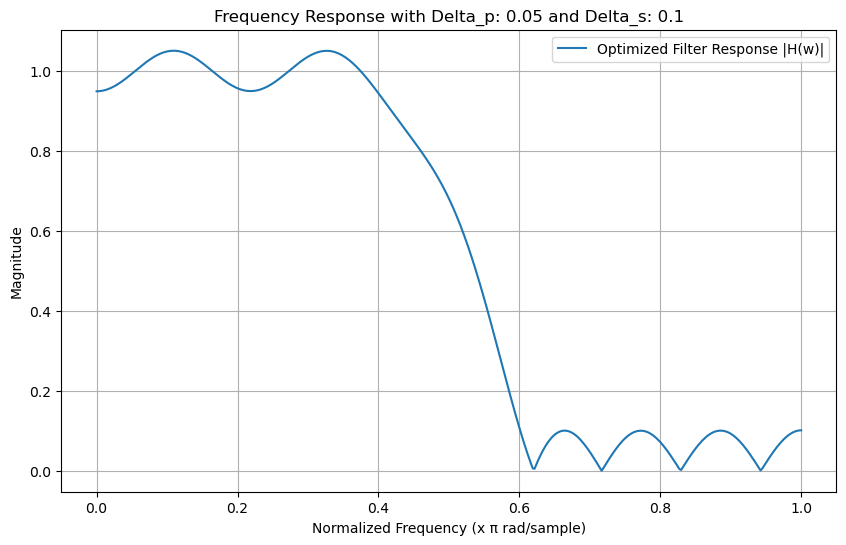

------------------------------------------------------------------------------------------------------------------------


In [7]:
actual_response = np.sqrt(H_real**2 + H_img**2)
plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, actual_response, label='Optimized Filter Response |H(w)|')
plt.title('Frequency Response with Delta_p: {} and Delta_s: {}'.format(delta_p, delta_s))
plt.xlabel('Normalized Frequency (x π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()
print('-' * 120)

In [8]:
## There are some warnings from using elementwise product and I use this code to 
## ignore them in the output
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*")

Now we want to plot the output signals for different $f_p$, $f_s$ and N and visualize them :
So we create a function that do all the steps up in one step and then plot the output for different N's 

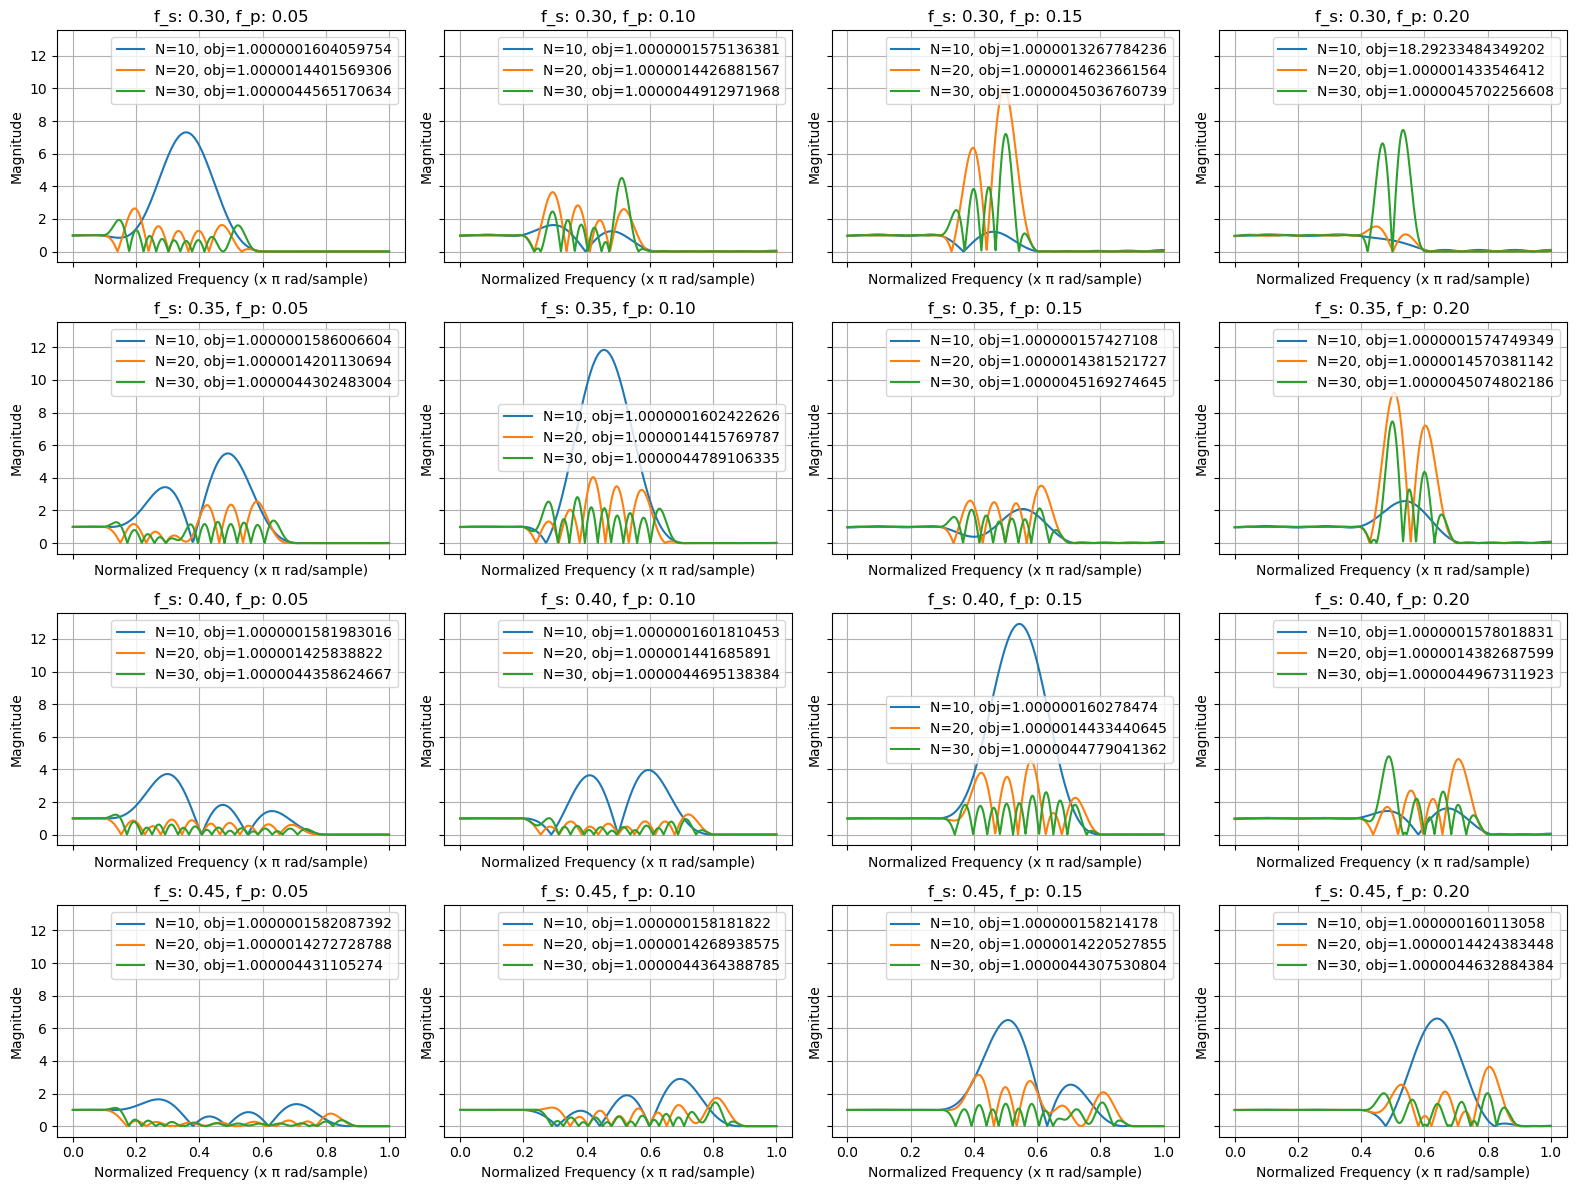

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [22]:
def solve_and_collect(N, D, f_s, f_p):
    num_w = N * 40
    w, h, Hd, p_indicies, s_indicies, h_tilde, H_real, H_img = get_mat(num_w, N, D, f_s, f_p)
    # min the max of |H(w) - H_d(w)|
    obj = cp.Minimize(cp.max(cp.square(H_real - Hd.real) + (cp.square(H_img - Hd.imag))))
    prob = cp.Problem(obj, get_consts(delta_p, delta_s, p_indicies, s_indicies, h_tilde)) # get constraints from the get_consts function
    prob.solve(solver=cp.SCS)
    
    if prob.status == cp.OPTIMAL or prob.status == cp.OPTIMAL_INACCURATE:
        H_real = np.exp(-1j * N * w).real * h_tilde.value
        H_img = np.exp(-1j * N * w).imag * h_tilde.value
        
        actual_response = np.sqrt(H_real**2 + H_img**2)
        return w, actual_response, prob.value
    return None, None, None

def plot_all(N_values, D, fs_values, fp_values):
    num_rows = len(fs_values)
    num_cols = len(fp_values)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4 * num_cols, 3 * num_rows), sharex=True, sharey=True)
    
    for i, f_s in enumerate(fs_values):
        for j, f_p in enumerate(fp_values):
            ax = axes[i, j] if num_rows > 1 else axes[j]
            for N in N_values:
                w, response, obj = solve_and_collect(N, D, f_s, f_p)
                if response is not None:
                    ax.plot(w / np.pi, response, label=f'N={N}, obj={obj}')
            ax.set_title(f"f_s: {f_s:.2f}, f_p: {f_p:.2f}")
            ax.set_xlabel('Normalized Frequency (x π rad/sample)')
            ax.set_ylabel('Magnitude')
            ax.legend()
            ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example parameters
N_values = [10, 20, 30]
fs_values = [0.3, 0.35, 0.4, 0.45]
fp_values = [0.05, 0.1, 0.15, 0.2]

# Generate plots
plot_all(N_values, 8.25, fs_values, fp_values)
print('-' * 184)


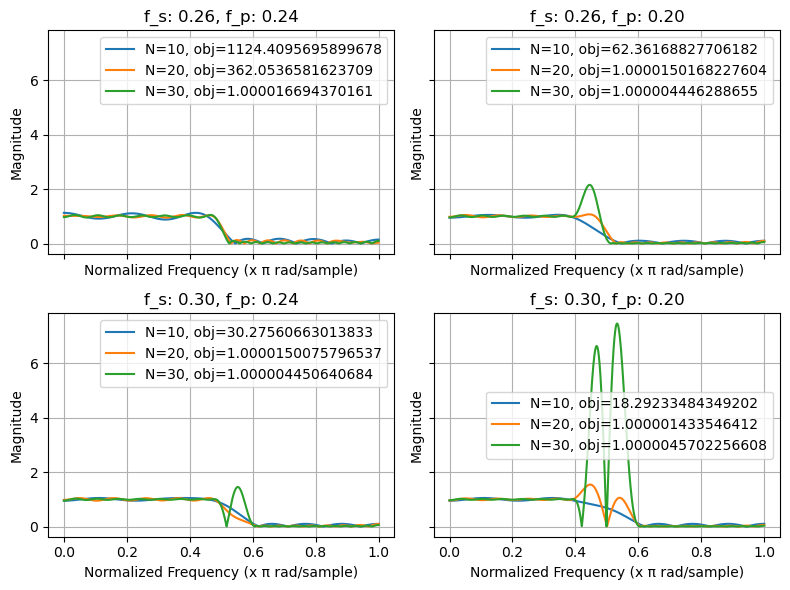

In [ ]:
N_values1 = [10, 20, 30]
fs_values1 = [0.26, 0.3]
fp_values1 = [0.24, 0.2]
plot_all(N_values1, 8.25, fs_values1, fp_values1)

Now we plot 3d plots to compare H desired with our signals :

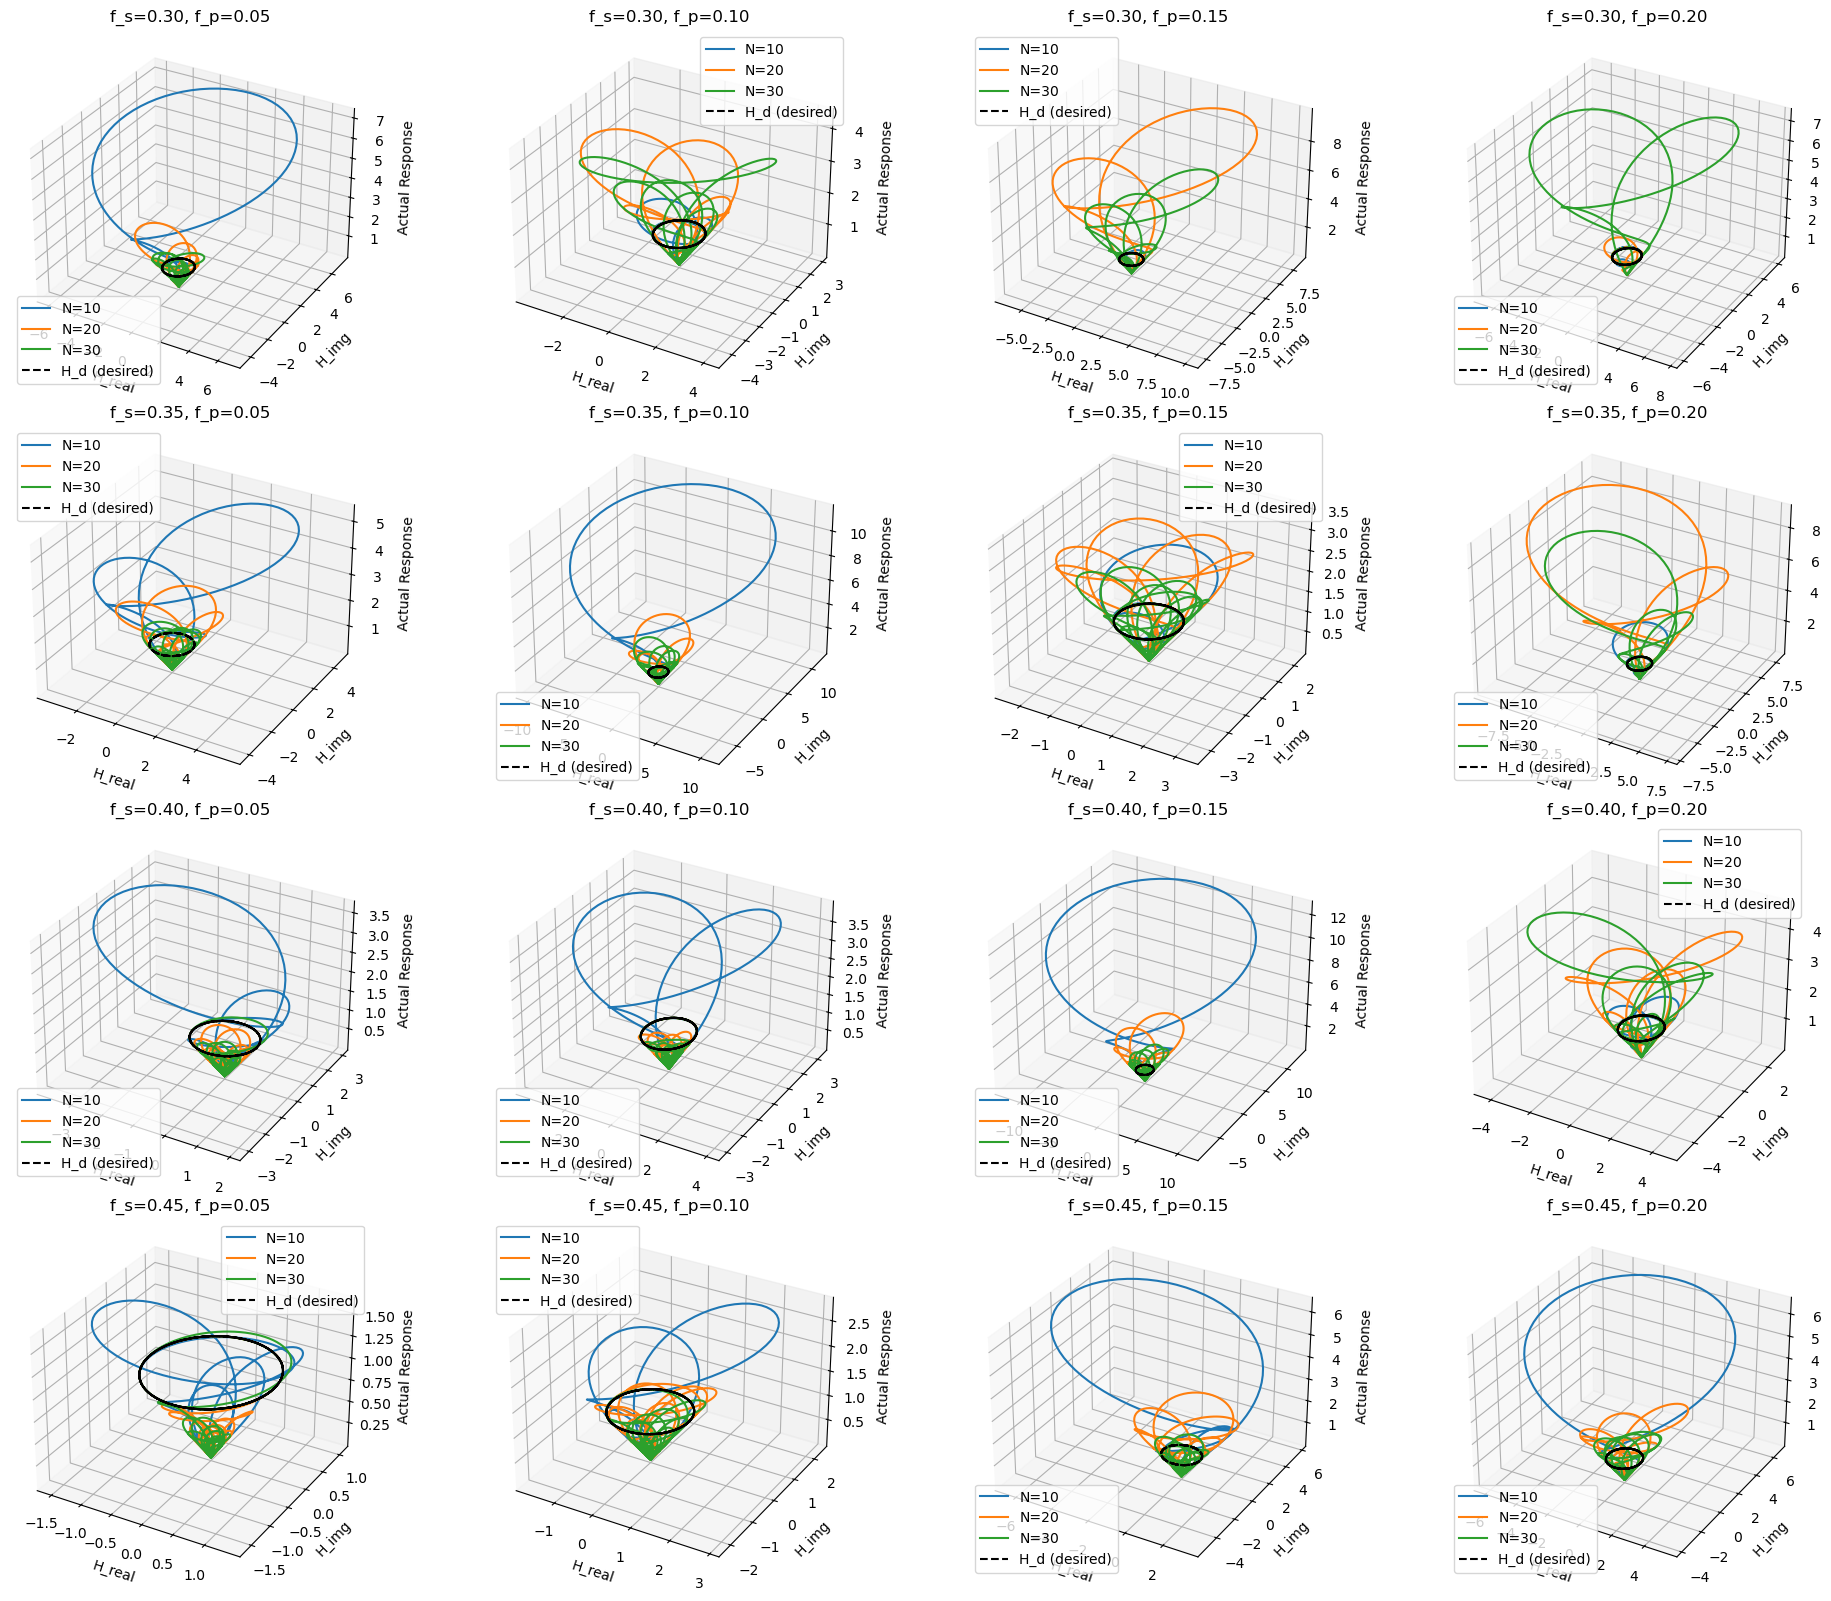

In [30]:
def solve_and_collect_3d(N, D, f_s, f_p):
    num_w = N * 40
    w, h, Hd, p_indicies, s_indicies, h_tilde, H_real, H_img = get_mat(num_w, N, D, f_s, f_p)
    
    obj = cp.Minimize(cp.max(cp.square(H_real - Hd.real) + (cp.square(H_img - Hd.imag))))
    prob = cp.Problem(obj, get_consts(delta_p, delta_s, p_indicies, s_indicies, h_tilde))
    prob.solve(solver=cp.SCS)
    
    if prob.status == cp.OPTIMAL or prob.status == cp.OPTIMAL_INACCURATE:
        H_real = np.exp(-1j * N * w).real * h_tilde.value
        H_img = np.exp(-1j * N * w).imag * h_tilde.value
        actual_response = np.sqrt(H_real**2 + H_img**2)
        return w, H_real, H_img, actual_response, Hd
    return None, None, None, None, None

def plot_3d_per_combination(N_values, D, fs_values, fp_values):
    num_rows = len(fs_values)
    num_cols = len(fp_values)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 4 * num_rows), subplot_kw={'projection': '3d'})
    
    if num_rows == 1 and num_cols == 1:
        axes = [[axes]]
    elif num_rows == 1 or num_cols == 1:
        axes = [axes]

    for i, f_s in enumerate(fs_values):
        for j, f_p in enumerate(fp_values):
            ax = axes[i][j] if num_rows > 1 else axes[j]
            for N in N_values:
                w, H_real, H_img, actual_response, Hd = solve_and_collect_3d(N, D, f_s, f_p)
                if H_real is not None and H_img is not None:
                    # Plot actual response
                    ax.plot(H_real, H_img, actual_response, label=f'N={N}')
            # Plot desired response Hd
            if Hd is not None:
                ax.plot(Hd.real, Hd.imag, np.abs(Hd), 'k--', label='H_d (desired)')
            ax.set_title(f"f_s={f_s:.2f}, f_p={f_p:.2f}")
            ax.set_xlabel('H_real')
            ax.set_ylabel('H_img')
            ax.set_zlabel('Actual Response')
            ax.legend()
    
    plt.tight_layout()
    plt.show()

# Example parameters
N_values = [10, 20, 30]
fs_values = [0.3, 0.35, 0.4, 0.45]
fp_values = [0.05, 0.1, 0.15, 0.2]

# Generate 3D plots for each combination of f_s and f_p, including H_d
plot_3d_per_combination(N_values, 8.25, fs_values, fp_values)


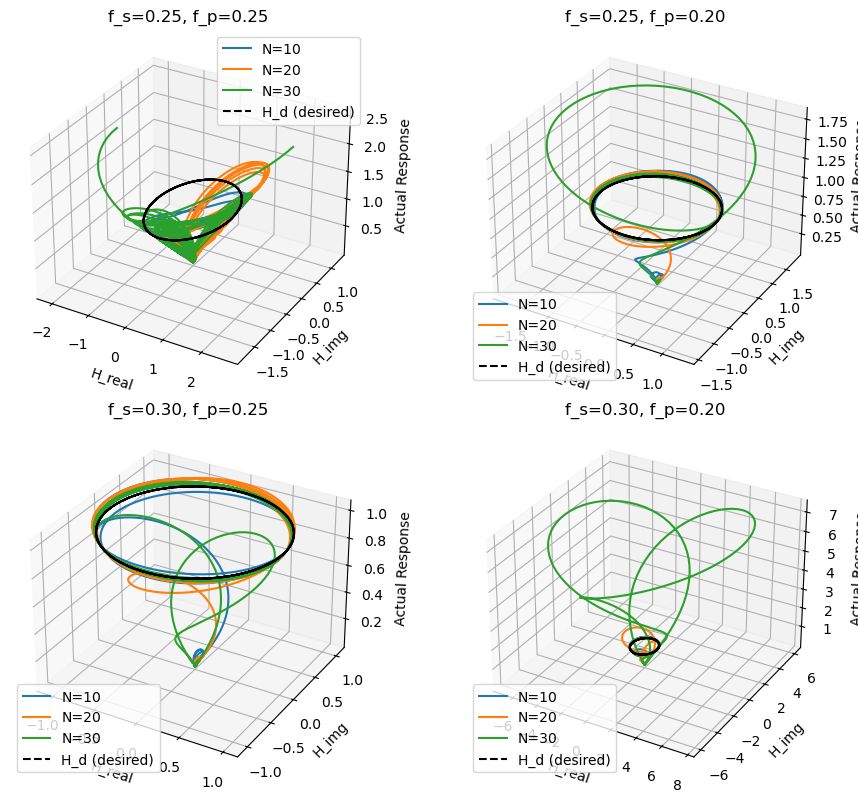

In [31]:
N_values1 = [10, 20, 30]
fs_values1 = [0.25, 0.3]
fp_values1 = [0.25, 0.2]
plot_3d_per_combination(N_values1, 8.25, fs_values1, fp_values1)

#### Result : 
As we saw 
- when we increase the N we can make more complex functions and so we get smaller objective with the same constraints, 
- when we decrease the $f_p$ we have smaller interval for its constraint and so we have simpler constraint and we can get <br> smaller objective
  $[0, \omega_p] = [0, 2 \pi f_p]$ becomes smaller interval when decreasing $f_p$ 
- when we increase the fs we have smaller interval for its constraint and so we have simpler constraint and we can get <br> smaller objective
  $[\omega_s, \pi] = [2 \pi f_s, \pi]$ becomes smaller interval when increasing $f_s$ 

### Q2

# 2. Introduction to Convex Optimization Algorithms, Part 1 (30 Pts)

#### Note: Most of the text is devoted to introducing you to the basics of some optimization algorithms. If you are already familiar with them, skip these parts and go straight to the objective section.

Minimization algorithms are a crucial part of optimization problems. More importantly, using a suitable optimization algorithm results in a significant reduction in computation time and memory and is preferred over generic convex optimization solvers in many instances. Generic solvers need to handle even pathological problem formulations, which comes at the cost of efficiency.

For simplicity, first, we will investigate two algorithms for the LASSO problem.

### LASSO Problem
Minimize:
$$
\frac{1}{2} \|Ax - b\|_2^2 + \gamma \|x\|_1 \tag{1}
$$

## Proximal Gradient Algorithm

In many cases, parts of the objective are not differentiable, in particular when we have indicator functions for constraints. In some other cases, the (sub)gradients exist but may be ill-behaved (a good example is the logarithm function). In these cases, we can break the function into two parts and proceed as follows:

Minimize:
$$
f(x) + g(x)
$$

Where \( f \) is smooth and \( g \) is proper convex lower semi-continuous. Most usually, we want \( g \) to have a simple closed-form proximal operator:
$$
\text{prox}_g(y) = \arg \min_y \left\{ \frac{1}{2} \|y - x\|_2^2 + g(y) \right\} \tag{2}
$$

Now that we know the background, the proximal gradient algorithm is as follows:
$$
x^{k+1} := \text{prox}_{\lambda g} \left( x^k - \lambda \nabla f(x^k) \right)
$$

It converges with rate \( O(1/k) \) when \( \nabla f \) is Lipschitz continuous with constant \( L \) and step sizes are \( \lambda^k = \lambda \in (0, 1/L] \).

For the LASSO problem, we have calculated the steps for \( x \):
$$
x^{k+1} := \text{prox}_{\lambda \| \cdot \|_1} \left( x^k - \lambda A^T (Ax^k - b) \right) \tag{3}
$$

Where the proximal operator of \( \| \cdot \|_1 \) is the soft thresholding operator, as you can easily verify:
$$
\text{prox}_{\lambda \| \cdot \|_1}(y) = 
\begin{cases} 
y_i - \lambda & y_i > \lambda \\ 
0 & -\lambda \leq y_i \leq \lambda \\ 
y_i + \lambda & y_i < -\lambda 
\end{cases} \tag{4}
$$

### Alternating Direction Method of Multipliers (ADMM)

Consider again the problem:
$$
\min f(x) + g(x)
$$

We formulate the Augmented Lagrangian in the following way, and optimize it over each variable \( x, y, \mu \) at each time. The minimization steps can be written in the following equivalent form:
$$
L_\rho = f(x) + g(y) + \langle \mu, x - y \rangle + \frac{\rho}{2} \|x - y\|_2^2
$$

The steps for ADMM are:
$$
x^{k+1} = \text{prox}_f(x^{k+1} - \mu^k / \rho) \\
y^{k+1} = \text{prox}_g(x^{k+1} + \mu^k / \rho) \\
\mu^{k+1} = \mu^k + \rho (x^{k+1} - y^{k+1}) \tag{5}
$$

For the LASSO problem:
$$
x^{k+1} = (I + \rho A^T A)^{-1} \left( y^k - \mu^k - \rho A^T b \right) \\
y^{k+1} = \text{prox}_{\| \cdot \|_1 / \rho} (x^{k+1} + \mu^k / \rho) \\
\mu^{k+1} = \mu^k + \rho (x^{k+1} - y^{k+1}) \tag{6}
$$

## Objectives:
We aim to implement the three algorithms and compare their performance. Implementation should be in Python, using generic libraries as Numpy, Scipy, etc. Your implementations should be "generally efficient," that is, some basic coding steps toward efficiency should be taken into account. However, it is not a coding contest and simply avoiding common sense mistakes is enough.

### Tasks:
1. Implement the loss function in CVXPY and solve the problem for different dimensions of the input matrix. Also, report the time spent by CVXPY.
2. Implement the proximal gradient algorithm in Python, and repeat Part 1. You are allowed to tune the step-size parameter as you deem fit, but include a few results for each step-size.
3. Implement the ADMM algorithm for LASSO, and repeat Part 1. Report the changes for a few different choices of \( \rho \), for a fixed matrix dimension of your choice.


#### Part1 : 

In [97]:
# I make some changes in this function like changing the name of variables :
def generate_data(n_samples=100, n_features=500, n_effective_features=10, noise=0.1):

    np.random.seed(3)
    
    A = np.random.randn(n_samples, n_features)
    
    x = np.zeros(n_features)
    effective_indices = np.random.choice(n_features, n_effective_features, replace=False)
    x[effective_indices] = np.random.randn(n_effective_features)
    
    b = A.dot(x) + noise * np.random.randn(n_samples)
    
    return A, b, x

In [98]:
# we make a function that solve the lasso problem with ready solvers
def solve_lasso(A, gamma, b):
    m, n = A.shape
    x = cp.Variable(n)
    obj = cp.Minimize(1/2*cp.norm2(A @ x - b) + gamma* cp.norm1(x))
    prob = cp.Problem(obj)

    start_t = time.time()
    prob.solve()
    end_t = time.time()

    return x.value, -start_t + end_t, prob.value

In [99]:
A, b, x_true = generate_data()
gamma = 0.1
x_lasso, t_lasso, prob_value = solve_lasso(A, gamma, b)
print("lasso time : ", t_lasso)
print("prob value : ", prob_value)
print("norm2 of Ax-b : ", np.linalg.norm(A @ x_lasso - b, 2))
print("norm2 of x_true - x_lasso : ", np.linalg.norm(x_lasso - x_true, 2))

lasso time :  0.07474756240844727
prob value :  0.880318114037477
norm2 of Ax-b :  2.7673601640637786e-12
norm2 of x_true - x_lasso :  0.14461031424193282


#### solving the problem with different input matrices :

In [116]:
lasso_times = {}
for n_samples in [100, 300, 500, 700]:
    for n_features in [100, 300, 500, 700]:
        A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)
        x_lasso, t_lasso, prob_value = solve_lasso(A, gamma, b)
        print(f"shape : ({n_samples}, {n_features})")
        print("lasso time : ", t_lasso)
        print("prob value : ", prob_value)
        print("norm2 of Ax-b : ", np.linalg.norm(A @ x_lasso - b, 2))
        print("norm2 of x_true - x_lasso : ", np.linalg.norm(x_lasso - x_true, 2))
        print('-'* 100)
        lasso_times[(n_samples, n_features)] = t_lasso

shape : (100, 100)
lasso time :  0.0216982364654541
prob value :  0.7296530566967565
norm2 of Ax-b :  0.34278538060791053
norm2 of x_true - x_lasso :  0.15518490329022896
----------------------------------------------------------------------------------------------------
shape : (100, 300)
lasso time :  0.026448965072631836
prob value :  0.9567370880756908
norm2 of Ax-b :  1.6394188108756713e-11
norm2 of x_true - x_lasso :  0.14737368408586982
----------------------------------------------------------------------------------------------------
shape : (100, 500)
lasso time :  0.06120181083679199
prob value :  0.880318114037477
norm2 of Ax-b :  2.7673601640637786e-12
norm2 of x_true - x_lasso :  0.14461031424193282
----------------------------------------------------------------------------------------------------
shape : (100, 700)
lasso time :  0.0976552963256836
prob value :  0.5227696680345948
norm2 of Ax-b :  3.37710434247145e-13
norm2 of x_true - x_lasso :  0.10466670459525532
----

#### Part2: 

In [144]:
# we make a function that return the soft thresholding operator : 
def soft_thresholding(y, lam):
    return np.sign(y) * np.maximum(np.abs(y) - lam, 0) 

# we make a function that do the proximal_gradient, we do this graident for them 
# max iteration and if it's update become less than the tolerence we stop
def proximal_gradient(A, b, gamma, step_size, max_iter=1e7, tol=1e-6):
    m, n = A.shape
    x = np.zeros(n) # initialize the x 
    x_cop = copy.deepcopy(x)


    start_t = time.time()
    # do this for effiency
    AtA = A.T @ A
    Atb = A.T @ b    
    
    for k in range(int(max_iter)):
        grad = AtA @ x_cop - Atb
        x_new = soft_thresholding(x_cop - step_size*grad, step_size* gamma)

        if np.linalg.norm(x_new - x_cop, 2) < tol:
            break

        x_cop = x_new 
    end_t = time.time()

    print(f"max iteration : {k} done for tol : {tol}")  
    
    return x_cop, end_t -start_t

In [145]:
L = np.linalg.norm(A.T @ A, 2) # Lipschitz constant (largest eigenvalue of A.T @ A
step_size = 1 / L # step size for convergence 
x_prox, time_prox = proximal_gradient(A, b, gamma, step_size)
print("prox time : ", time_prox)
print("norm2 of Ax-b : ", np.linalg.norm(A @ x_prox - b, 2))
print("norm2 of x_true - x_prox : ", np.linalg.norm(x_prox - x_true, 2))

max iteration : 3881 done for tol : 1e-06
prox time :  0.24468660354614258
norm2 of Ax-b :  0.6146430954338942
norm2 of x_true - x_prox :  0.19694168870728884


#### solving the problem with different input matrices and stepsizes : 

In [146]:
prox_times = {}
epsilon = 1e-6
for n_samples in [100, 300, 500, 700]:
    for n_features in [100, 300, 500, 700]:
        A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)
        L = np.linalg.norm(A.T, 2)**2
        step_sizes = np.linspace(1/(3*L), 1/L, 3)
        p_time = []
        for step_size in step_sizes:
            print(f"shape : ({n_samples}, {n_features}) step_size : {step_size}")
            x_prox, time_prox = proximal_gradient(A, b, gamma, step_size)
            print("prox time : ", time_prox)
            print("norm2 of Ax-b : ", np.linalg.norm(A @ x_prox - b, 2))
            print("norm2 of x_true - x_prox : ", np.linalg.norm(x_prox - x_true, 2))
            print('-' * 100)
            p_time.append(time_prox)
            
        prox_times[(n_samples, n_features)] = min(p_time)

shape : (100, 100) step_size : 0.0008648352987562953
max iteration : 3285 done for tol : 1e-06
prox time :  0.049074411392211914
norm2 of Ax-b :  0.37607622019918874
norm2 of x_true - x_prox :  0.1366502628907024
----------------------------------------------------------------------------------------------------
shape : (100, 100) step_size : 0.0017296705975125906
max iteration : 1796 done for tol : 1e-06
prox time :  0.009505271911621094
norm2 of Ax-b :  0.376115059522118
norm2 of x_true - x_prox :  0.13662622630816834
----------------------------------------------------------------------------------------------------
shape : (100, 100) step_size : 0.002594505896268886
max iteration : 1260 done for tol : 1e-06
prox time :  0.019550800323486328
norm2 of Ax-b :  0.37612672805095015
norm2 of x_true - x_prox :  0.1366195436152123
----------------------------------------------------------------------------------------------------
shape : (100, 300) step_size : 0.0004614654279790642
max ite

In [147]:
for key in lasso_times:
    print(f"shape : {key}, lasso_time = {lasso_times[key]}, proximal_time = {prox_times[key]}")

shape : (100, 100), lasso_time = 0.0216982364654541, proximal_time = 0.009505271911621094
shape : (100, 300), lasso_time = 0.026448965072631836, proximal_time = 0.5218069553375244
shape : (100, 500), lasso_time = 0.06120181083679199, proximal_time = 0.945976734161377
shape : (100, 700), lasso_time = 0.0976552963256836, proximal_time = 1.6346080303192139
shape : (300, 100), lasso_time = 0.04851531982421875, proximal_time = 0.0
shape : (300, 300), lasso_time = 0.2835056781768799, proximal_time = 0.13534808158874512
shape : (300, 500), lasso_time = 0.4153473377227783, proximal_time = 0.5250289440155029
shape : (300, 700), lasso_time = 0.608283519744873, proximal_time = 0.6020400524139404
shape : (500, 100), lasso_time = 0.07651901245117188, proximal_time = 0.0
shape : (500, 300), lasso_time = 0.5023431777954102, proximal_time = 0.017196178436279297
shape : (500, 500), lasso_time = 1.2882776260375977, proximal_time = 0.16976308822631836
shape : (500, 700), lasso_time = 1.538757085800171, p

#### results :
we consider the best step_size and it's time for the proximal<br> 
As we saw in our algorithm when the dimension increases our algorithm take smaller time than the solver to converge and find the optimal answer 
for 700 * 700 it takes smaller time than the solver also it take smaller time when we have matrix $A_{n*m}$ and m << n because we have $A^TA$ is m*m and calculations are faster but as dimension increases proximal time is faster than solver even if we have big matrix 

#### Part3:

In [148]:
def admm(A, b, gamma, rho, max_iter=1e7, tol=1e-6):
    m, n = A.shape
    x = np.zeros(n) # Primal variable
    y = np.zeros(n) # Auxiliary variable
    mu = np.zeros(n) # dual variable 

    start_t = time.time() 
    rho_Atb = rho * A.T @ b
    L_inv = np.linalg.inv(rho * A.T @ A + np.eye(n))

    for k in range(int(max_iter)):
        x = L_inv @ (y - mu + rho_Atb)
        y_old = y
        y = soft_thresholding(x + mu, gamma/rho)
        mu += x - y

        pr_norm = np.linalg.norm(x - y, 2)  # Primal residual
        rs_norm = rho * np.linalg.norm(y - y_old, 2)  # Dual residual

        if pr_norm < tol and rs_norm < tol:
            break
    
    end_t = time.time()
    
    print(f"max iteration : {k} done for tol : {tol}")  
    
    return x, end_t - start_t

In [152]:
rho = 2
x_admm, time_admm = admm(A, b, gamma, rho)
print("admm time : ", time_admm)
print("norm2 of Ax-b : ", np.linalg.norm(A @ x_admm - b, 2))
print("norm2 of x_true - x_prox : ", np.linalg.norm(x_admm - x_true, 2))

max iteration : 942 done for tol : 1e-06
admm time :  0.08059048652648926
norm2 of Ax-b :  0.3707851347769358
norm2 of x_true - x_prox :  0.3028874242759541


In [153]:
admm_times = {}
for n_samples in [100, 300, 500, 700]:
    for n_features in [100, 300, 500, 700]:
        A, b, x_true = generate_data(n_samples=n_samples, n_features=n_features)
        rho_times = []
        for rho in [1, 2, 4, 8, 16, 32, 64]:
            print(f"shape : ({n_samples}, {n_features}) rho : {rho}")
            x_admm, time_admm = admm(A, b, gamma, rho)
            print("admm time : ", time_admm)
            print("norm2 of Ax-b : ", np.linalg.norm(A @ x_admm - b, 2))
            print("norm2 of x_true - x_prox : ", np.linalg.norm(x_admm - x_true, 2))
            print('-' * 100)
            rho_times.append(time_admm)
        admm_times[(n_samples, n_features)] = rho_times

shape : (100, 100) rho : 1
max iteration : 668 done for tol : 1e-06
admm time :  0.01824045181274414
norm2 of Ax-b :  0.3761425098226065
norm2 of x_true - x_prox :  0.1366119790394244
----------------------------------------------------------------------------------------------------
shape : (100, 100) rho : 2
max iteration : 338 done for tol : 1e-06
admm time :  0.004556179046630859
norm2 of Ax-b :  0.25885387276108346
norm2 of x_true - x_prox :  0.2392648008588369
----------------------------------------------------------------------------------------------------
shape : (100, 100) rho : 4
max iteration : 298 done for tol : 1e-06
admm time :  0.0046901702880859375
norm2 of Ax-b :  0.19329131775207795
norm2 of x_true - x_prox :  0.37731276439965505
----------------------------------------------------------------------------------------------------
shape : (100, 100) rho : 8
max iteration : 266 done for tol : 1e-06
admm time :  0.0041086673736572266
norm2 of Ax-b :  0.16493973426238548

#### Results :
As we saw when we increase $\rho$ the distnace between b and $A\tilde{x}$ become smaller but the distance between $\tilde{x}$ and $x$ become bigger and with very small $\rho's$ it takes more time and with very big $\rho's$ it takes more time, with the observed results in think a $\rho$ in the middle is good and takes less time

# Introduction to Convex Optimization Algorithms, Part 2 (50 Pts)

Consider the problem of graph learning, in which we intend to infer a graph by having observations of signals over a graph. One popular approach is to use the signal smoothness:
$$
x^T L x = \sum_{i,j} (x_i - x_j)^2 w_{ij}
$$

Where L and W are the Laplacian and weight matrix, respectively. We now investigate a popular cost function also implemented in GSPBOX MATLAB package:
$$
\min_{W \succeq 0} \|W \circ Z\|_{1,1} - \alpha^T \log(W1) + \frac{\beta}{2} \|W\|_F^2 \tag{1}
$$
 
$$
s.t. \quad W \geq 0, \quad W = W^T, \quad \text{diag}(W) = 0
$$

The above problem can be expressed only as a function of the upper triangular elements of W only, in the following way:
$$
\min_{w \succeq 0} 2z^T w - \alpha^T \log(Qw) + \beta \|w\|_2^2 \tag{7}
$$

Where Q is a sparse binary matrix which satisfies Qw = W1. It has been proposed recently that we solve the problem via ADMM, that is, to add a constraint Qw = v:

$$
\min_{v, w} f(w) + g(v) \quad \text{s.t. } Qw = v \tag{8}
$$

With f(w) = $2z^T w + \beta \|w\|_2^2$ and $g(v) = -\alpha^T \log(v)$ .  
Here, instead, for optimizing each ADMM subproblem, they use a proximal gradient step:

$$ 
w^{k+1} = \text{prox}_{\tau_1f} \left( w^k - \tau_1 t Q^T \left( Qw^k - v^k - \frac{\lambda^k}{t} \right) \right) = \max \left\{ \hat{w}^{k+1}, 0 \right\}
$$

$$
\hat{w}^{k+1} = \frac{w^k - \tau_1 t Q^T \left(Qw^k - v^k - \frac{\lambda^k}{t} \right) - 2 \tau_1z}{2\tau_1 \beta + 1} \tag{9}
$$  
$$
v^{k+1} = \text{prox}_{\tau_2 g} \left( v^k + \tau_2 t \left( Qw^{k+1} - v^k - \frac{\lambda^k}{t} \right) \right) 
$$ 

$$ 
= \frac{\tilde{v}^{k+1} + \sqrt{(\tilde{v}^{k+1})^2 + 4 \alpha \tau_2 \mathbb{1}}}{2} \tag{10}
$$  

$$ 
\tilde{v}^{k+1} = (1 - \tau_2 t) v^k + \tau_2 t Q w^{k+1} - \tau_2 \lambda^k
$$


$$
\lambda^{k+1} = \lambda^k + t \left( Qw^{k+1} - v^{k+1} \right) \tag{11} 
$$

Theoretical conditions on the step sizes for convergence are:  
$$
\tau_1 < \frac{1}{t \sigma_{max}^2} = \frac{1}{2t(N-1)}, \quad \tau_2 < \frac{1}{t}, \quad t > 0.
$$  

Use $r_p = \|t Q^T(v^{k+1} - v^{k})\|_2$, and $r_d = \|Qw^k - v^k\|_2$ as convergence criteria.

## Objective
1. Formulate the problem in CVXPY and evaluate its computation time for graphs with vertex numbers \( N = 30, 100 \).  
2. Implement the ADMM algorithm and evaluate its performance for the same parameters as Part 1. You are allowed to tune \( \tau_1, \tau_2 \), as you deem fit. Evaluate the time consumption of your algorithm the same way as Part 1.  
3. Compare both algorithms on the same graphs, using generic libraries such as Numpy. No need to optimize the ADMM method beyond \( O(n^2) \). It is highly recommended to use vectorized Numpy functions wherever possible.

## References
[1] X. Wang, C. Yao, H. Lei and A. M.-C. So, "An Efficient Alternating Direction Method for Graph Learning from Smooth Signals," *ICASSP 2021 - 2021 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP)*, Toronto, ON, Canada, 2021, pp. 5380-5384, doi: 10.1109/ICASSP39728.2021.9414791.


## Helper functions for part 3

In [4]:
'''Helper functions for graph creation.
Note: You do not need to use both graph types for the analysis.'''


def Sensor(N):
    random.seed(42)
    np.random.seed(42)
    logging.disable(logging.CRITICAL)
    G=pygsp.graphs.Sensor(N, seed=42)
    logging.disable(logging.NOTSET)
    return G

def Erdos(N):
    random.seed(42)
    np.random.seed(42)
    logging.disable(logging.CRITICAL)
    G=pygsp.graphs.ErdosRenyi(N,p=3/N, seed=42)
    logging.disable(logging.NOTSET)
    return G

In [5]:
'''Graph frequency filters for creating a single random smooth signal. You can change the functions, but the filter type ( 1\sqrt(lambda), lambda!=0 )
must remain the same.'''

def general_filter(graph, filter):
    '''Return unnormalized signal for given graph'''
    '''Uses normalized lambdas (/lambda max)'''
    U_selected=graph.U[:,1:]
    arr = np.random.normal(0, 1, size=(graph.N-1,))*filter(graph.e[1:]/np.max(graph.e))
    xi=U_selected@arr
    return xi

def Lin_Gaussian(lambdas):
    return np.reciprocal(np.sqrt(lambdas), out=np.zeros_like(lambdas), where=lambdas!=0)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ali\AppData\Local\Temp\ipykernel_21316\30316221.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''Graph frequency filters for creating a single random smooth signal. You can change the functions, but the filter type ( 1\sqrt(lambda), lambda!=0 )


In [8]:
def build_problem_data(G, x, alph = 1.0, beta=0.1):
    N = G.N
    upper_pairs = [(i, j) for i in range(N) for j in range(i+1, N)]
    z = []
    for (i, j) in upper_pairs:
        z.append((x[i] - x[j])**2)
    z = np.array(z)

    alpha = np.ones(N)
    M = len(upper_pairs)
    
    return z, alpha

In [9]:
def example_setup(N=30, alp=1):
    G = Sensor(N)  # or Erdos(N)
    # Ensure Fourier basis is computed:
    G.compute_fourier_basis()
    x = general_filter(G, Lin_Gaussian)
    z, alpha = build_problem_data(G, x, beta=0.1)
    return z, alpha * alp

In [35]:
def generate_Q(N):
    row_indices, col_indices = np.triu_indices(N, k=1)
    M = len(row_indices)
    Q = np.zeros((N, M), dtype=float)
    Q[row_indices, np.arange(M)] = 1
    Q[col_indices, np.arange(M)] = 1
    return Q

In [36]:
def calc_QW(x, n):
    y = np.zeros(n)

    for row in range(n):
        sum_row = 0
        idx = row - 1
        step = n - 2
        for col in range(row):
            sum_row += x[idx]
            idx += step
            step -= 1

        offset = row * n - row * (row + 1) // 2
        sum_row += np.sum(x[offset : offset + n - row - 1])
        y[row] = sum_row

    return y

In [91]:
def calc_QTW(x, n):
    y = np.zeros(n * (n - 1) // 2)
    idx = 0
    for row in range(n):
        for col in range(row + 1, n):
            y[idx] = x[row] + x[col]
            idx += 1

    return y

In [92]:
def solve_cvxpy(z, alpha, Q, beta=0.1):
    M = len(z)
    N = len(alpha)
    w_var = cp.Variable(M, nonneg=True)
    epsilon = 1e-6
    Qw = Q @ w_var
    obj = 2 * z @ w_var - alpha @ cp.log(Qw + epsilon) + beta * cp.norm2(w_var)**2

    constraints = [Qw >= epsilon]
    problem = cp.Problem(cp.Minimize(obj), constraints)

    start_time = time.time()
    problem.solve(solver=cp.SCS)
    end_time = time.time()

    print(f"CVXPY solved with status = {problem.status}")
    print(f"Objective value = {problem.value}")
    print(f"Time elapsed = {end_time - start_time:.3f} seconds")

    return w_var.value, problem.value

In [79]:
Q30 = generate_Q(30)
z30, alpha30 = example_setup(N=30)
w_opt30, obj_val30 = solve_cvxpy(z30, alpha30, Q30)

CVXPY solved with status = optimal
Objective value = -28.127787743070733
Time elapsed = 0.026 seconds


In [80]:
Q100 = generate_Q(100)
z100, alpha100 = example_setup(N=100)
w_opt100, obj_val100 = solve_cvxpy(z100, alpha100, Q100)

CVXPY solved with status = optimal
Objective value = -150.57050456609733
Time elapsed = 0.105 seconds


### Implementing simple ADMM with numpy :

In [100]:
import numpy as np
import time

def admm_graph_learning1(z, alpha, Q, beta=0.1, max_iter=5000, tol=1e-3, tau1=1e-3, tau2=1e-3, t=1e-3, verbose=True):
    m = len(z)
    n = len(alpha)

    start_time = time.time()

    w_k = np.zeros(m)
    v_k = np.full(n, 1)
    lam_k = np.zeros(n)
    QT = Q.T
    for k in range(max_iter):
        tmp = (Q @ w_k) - v_k - (lam_k / t)
        w_tilde = (w_k - tau1 * t * (QT @ tmp) - 2 * tau1 * z) / (2 * tau1 * beta + 1)
        w_next = np.maximum(w_tilde, 0)
        Qw_next = Q @ w_next

        v_tilde = (1 - tau2*t)*v_k + tau2*t*Qw_next - tau2*lam_k
        inside_sqrt = v_tilde**2 + 4 * alpha * tau2 
        v_next = (v_tilde + np.sqrt(inside_sqrt)) / 2
        lam_next = lam_k - t * (Qw_next - v_next)

        r_d = np.linalg.norm((Q @ w_k) - v_k, 2)
        r_p = t * np.linalg.norm(QT @ (v_next - v_k), 2)
        w_k, v_k, lam_k = w_next, v_next, lam_next

        # Check convergence
        if r_d < tol and r_p < tol:
            break

    end_time = time.time()

    # Compute final objective:
    # Obj(w,v) = 2 z^T w + beta||w||^2 - alpha^T log(v)
    final_obj = (2.0 * z.dot(w_k) + beta * np.sum(w_k**2) - alpha.dot(np.log(v_k+1e-18)))

    if verbose:
        print(f"\nADMM finished in {k+1} iterations, time = {end_time - start_time:.3f} s.")
        print(f"Final primal residual  r_d = {r_d:.3e}")
        print(f"Final dual   residual  r_p = {r_p:.3e}")
        print(f"Final objective value = {final_obj:.6f}")
        print(f"number of iterations : {k+1}")

    return w_k, v_k, lam_k, final_obj


### Implementing ADMM with max o(n^2) operation :

In [101]:
import numpy as np
import time

def admm_graph_learning(z, alpha, Q, beta=0.1, max_iter=5000, tol=1e-3, tau1=1e-3, tau2=1e-3, t=1e-3, verbose=True):
    m = len(z)
    n = len(alpha)

    start_time = time.time()

    w_k = np.zeros(m)
    v_k = np.full(n, 1)
    lam_k = np.zeros(n)
    QT = Q.T
    for k in range(max_iter):
        tmp = (calc_QW(w_k, n)) - v_k - (lam_k / t)
        w_tilde = (w_k - tau1 * t * (calc_QTW(tmp, n)) - 2 * tau1 * z) / (2 * tau1 * beta + 1)
        w_next = np.maximum(w_tilde, 0)
        Qw_next = calc_QW(w_next, n)

        v_tilde = (1 - tau2*t)*v_k + tau2*t*Qw_next - tau2*lam_k
        inside_sqrt = v_tilde**2 + 4 * alpha * tau2 
        v_next = (v_tilde + np.sqrt(inside_sqrt)) / 2
        lam_next = lam_k - t * (Qw_next - v_next)

        r_d = np.linalg.norm(calc_QW(w_k, n) - v_k, 2)
        r_p = t * np.linalg.norm(calc_QTW(v_next - v_k, n), 2)
        w_k, v_k, lam_k = w_next, v_next, lam_next

        # Check convergence
        if r_d < tol and r_p < tol:
            break

    end_time = time.time()

    # Compute final objective:
    # Obj(w,v) = 2 z^T w + beta||w||^2 - alpha^T log(v)
    final_obj = (2.0 * z.dot(w_k) + beta * np.sum(w_k**2) - alpha.dot(np.log(v_k+1e-18)))

    if verbose:
        print(f"\nADMM finished in {k+1} iterations, time = {end_time - start_time:.3f} s.")
        print(f"Final primal residual  r_d = {r_d:.3e}")
        print(f"Final dual   residual  r_p = {r_p:.3e}")
        print(f"Final objective value = {final_obj:.6f}")
        print(f"number of iterations : {k+1}")

    return w_k, v_k, lam_k, final_obj


In [102]:
Q30 = generate_Q(30)
z30, alpha30 = example_setup(N=30, alp=2)
beta30 = 0.25
w_opt30, obj_val30 = solve_cvxpy(z30, alpha30, Q30, beta30)


CVXPY solved with status = optimal
Objective value = -63.54172489083919
Time elapsed = 0.028 seconds


In [107]:
t    = 1/15
tau1 = 1/(2 * t * (30 - 1))
tau2 = 1 / t
print("ADMM with numpy : ", end="")
w_sol30, v_sol30, lam_sol30, obj30 = admm_graph_learning1(z30, alpha30, Q30, beta=beta30, tau1=tau1, tau2=tau2, t=t)
print("\nADMM with o(n^2) operation : ", end="")
w_sol30, v_sol30, lam_sol30, obj30 = admm_graph_learning(z30, alpha30, Q30, beta=beta30, tau1=tau1, tau2=tau2, t=t)
print('-'* 100)

ADMM with numpy : 
ADMM finished in 51 iterations, time = 0.007 s.
Final primal residual  r_d = 8.997e-04
Final dual   residual  r_p = 1.003e-04
Final objective value = -63.544447
number of iterations : 51

ADMM with o(n^2) operation : 
ADMM finished in 51 iterations, time = 0.062 s.
Final primal residual  r_d = 8.997e-04
Final dual   residual  r_p = 1.003e-04
Final objective value = -63.544447
number of iterations : 51
----------------------------------------------------------------------------------------------------


In [108]:
Q50 = generate_Q(50)
z50, alpha50 = example_setup(N=50, alp=2)
beta50 = 0.35
w_opt50, obj_val50 = solve_cvxpy(z50, alpha50, Q50, beta50)

CVXPY solved with status = optimal
Objective value = -109.89377384307375
Time elapsed = 0.038 seconds


In [109]:
t    = 1 / 25
tau1 = 1/(2 * t* (50 - 1))
tau2 = 1/ t
print("ADMM with numpy : ", end="")
w_sol50, v_sol50, lam_sol50, obj50 = admm_graph_learning1(z50, alpha50, Q50, beta=beta50, tau1=tau1, tau2=tau2, t=t)
print("\nADMM with o(n^2) operation : ", end="")
w_sol50, v_sol50, lam_sol50, obj50 = admm_graph_learning(z50, alpha50, Q50, beta=beta50, tau1=tau1, tau2=tau2, t=t)
print('-'* 100)

ADMM with numpy : 
ADMM finished in 73 iterations, time = 0.025 s.
Final primal residual  r_d = 9.475e-04
Final dual   residual  r_p = 1.709e-05
Final objective value = -109.917174
number of iterations : 73

ADMM with o(n^2) operation : 
ADMM finished in 73 iterations, time = 0.199 s.
Final primal residual  r_d = 9.475e-04
Final dual   residual  r_p = 1.709e-05
Final objective value = -109.917174
number of iterations : 73
----------------------------------------------------------------------------------------------------


In [113]:
Q100 = generate_Q(100)
z100, alpha100 = example_setup(N=100, alp=2)
beta100 = 0.25
w_opt100, obj_val100 = solve_cvxpy(z100, alpha100, Q100)

CVXPY solved with status = optimal
Objective value = -385.50536874585276
Time elapsed = 0.096 seconds


In [114]:
t    = 1 / 50
tau1 = 1/(2 * t* (100 - 1))
tau2 = 1/ t
print("ADMM with numpy : ", end="")
w_sol100, v_sol100, lam_sol100, obj100 = admm_graph_learning(z100, alpha100, Q100, beta=beta100, tau1=tau1, tau2=tau2, t=t)
print("\nADMM with o(n^2) operation : ", end="")
w_sol100, v_sol100, lam_sol100, obj100 = admm_graph_learning(z100, alpha100, Q100, beta=beta100, tau1=tau1, tau2=tau2, t=t)
print('-'* 100)

ADMM with numpy : 
ADMM finished in 89 iterations, time = 0.758 s.
Final primal residual  r_d = 9.906e-04
Final dual   residual  r_p = 6.755e-06
Final objective value = -313.210160
number of iterations : 89

ADMM with o(n^2) operation : 
ADMM finished in 89 iterations, time = 0.764 s.
Final primal residual  r_d = 9.906e-04
Final dual   residual  r_p = 6.755e-06
Final objective value = -313.210160
number of iterations : 89
----------------------------------------------------------------------------------------------------


### explanations :
since numpy uses vectorized multiplication and optimized method even it is faster even when uses o(n^3) algorithm 